# Customer Behaviour Analysis – Raw to Clean Pipeline

## Project Description
This notebook demonstrates end-to-end data cleaning and exploratory data analysis (EDA) on a raw customer transactions dataset. The goal is to transform messy transactional data into an analysis-ready dataset and extract insights related to customer spending behavior, segmentation, and retention.

## 1. Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")


## 2. Load Raw Dataset

In [3]:

raw_df = pd.read_csv("customer_transactions_RAW.csv")
raw_df.head()


,TransactionID,CustomerID,TransactionDate,ProductCategory,Quantity,UnitPrice,PaymentMethod,Country,TotalAmount
0,100000,1860.0,2023-11-22,Clothing,5,1664.10,Cash,USA,8320.50
1,100001,4772.0,2023-12-23,Electronics,5,3535.13,Cash,Canada,17675.65
2,100002,4092.0,2023-12-31,Clothing,4,NaN,Credit Card,Canada,12797.56
3,100003,1466.0,2023-07-18,Beauty,3,2360.34,Debit Card,Canada,7081.02
4,100004,NaN,2023-08-29,Sports,5,4004.66,Credit Card,India,20023.30


## 3. Initial Data Inspection

In [4]:

raw_df.shape, raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    51000 non-null  int64  
 1   CustomerID       48450 non-null  float64
 2   TransactionDate  51000 non-null  object 
 3   ProductCategory  48450 non-null  object 
 4   Quantity         51000 non-null  int64  
 5   UnitPrice        48481 non-null  float64
 6   PaymentMethod    48436 non-null  object 
 7   Country          51000 non-null  object 
 8   TotalAmount      51000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.5+ MB


((51000, 9), None)

## 4. Data Quality Issues


Key issues identified:
- Missing values in categorical and numerical fields
- Duplicate transaction records
- Inconsistent category labels
- Extreme outliers in pricing


## 5. Data Cleaning

### 5.1 Handle Missing Values

In [5]:

raw_df.isnull().sum()


TransactionID         0
CustomerID         2550
TransactionDate       0
ProductCategory    2550
Quantity              0
UnitPrice          2519
PaymentMethod      2564
Country               0
TotalAmount           0
dtype: int64

In [6]:

raw_df['ProductCategory'].fillna(raw_df['ProductCategory'].mode()[0], inplace=True)
raw_df['PaymentMethod'].fillna(raw_df['PaymentMethod'].mode()[0], inplace=True)
raw_df['UnitPrice'].fillna(raw_df['UnitPrice'].median(), inplace=True)


C:\Users\himan\AppData\Local\Temp\ipykernel_436\143067212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_df['ProductCategory'].fillna(raw_df['ProductCategory'].mode()[0], inplace=True)
C:\Users\himan\AppData\Local\Temp\ipykernel_436\143067212.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

### 5.2 Remove Duplicate Records

In [7]:

raw_df.duplicated().sum()


np.int64(869)

In [8]:

clean_df = raw_df.drop_duplicates()


### 5.3 Standardize Categories

In [9]:

clean_df['PaymentMethod'] = clean_df['PaymentMethod'].str.upper()
clean_df['ProductCategory'] = clean_df['ProductCategory'].str.title()


C:\Users\himan\AppData\Local\Temp\ipykernel_436\516712259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['PaymentMethod'] = clean_df['PaymentMethod'].str.upper()
C:\Users\himan\AppData\Local\Temp\ipykernel_436\516712259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['ProductCategory'] = clean_df['ProductCategory'].str.title()


### 5.4 Treat Outliers

In [10]:

q1 = clean_df['UnitPrice'].quantile(0.25)
q3 = clean_df['UnitPrice'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
clean_df = clean_df[clean_df['UnitPrice'] <= upper_limit]


## 6. Feature Engineering

In [11]:

clean_df['TransactionDate'] = pd.to_datetime(clean_df['TransactionDate'])
clean_df['Month'] = clean_df['TransactionDate'].dt.month
clean_df['TotalAmount'] = clean_df['Quantity'] * clean_df['UnitPrice']


## 7. Exploratory Data Analysis

### 7.1 Transaction Amount Distribution

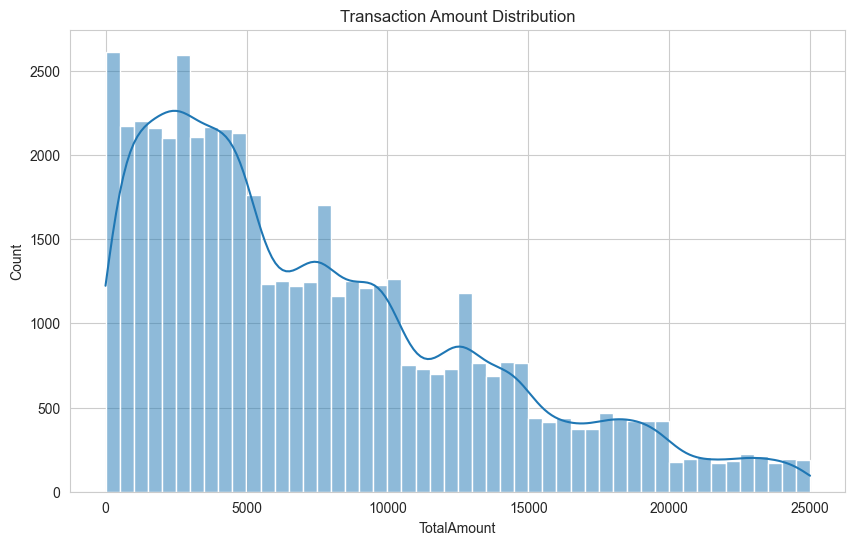

In [12]:

sns.histplot(clean_df['TotalAmount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


### 7.2 Revenue by Product Category

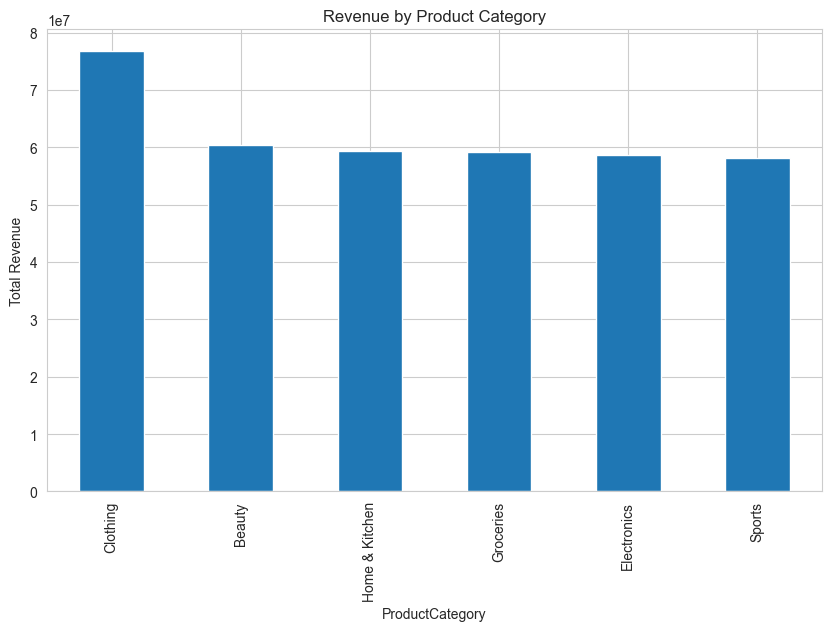

In [13]:

category_rev = clean_df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)
category_rev.plot(kind='bar')
plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue")
plt.show()


### 7.3 Customer-Level Spending

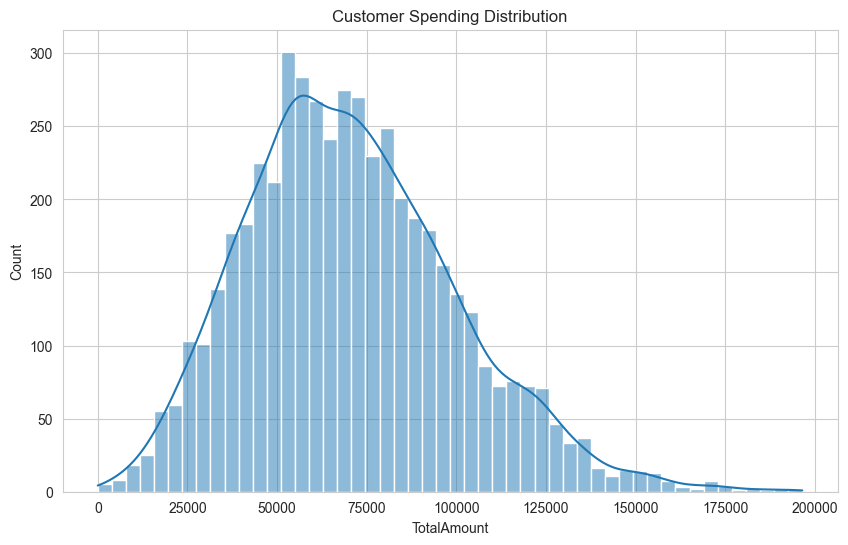

In [14]:

customer_spend = clean_df.groupby('CustomerID')['TotalAmount'].sum()
sns.histplot(customer_spend, bins=50, kde=True)
plt.title("Customer Spending Distribution")
plt.show()


### 7.4 Monthly Revenue Trend

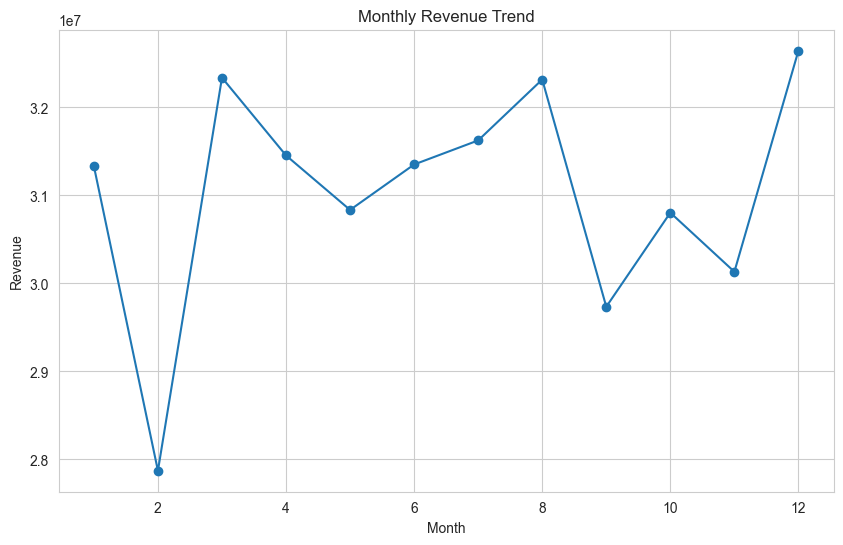

In [15]:

monthly_sales = clean_df.groupby('Month')['TotalAmount'].sum()
monthly_sales.plot(marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


## 8. Key Insights


- Customer spending is highly skewed, with a small segment contributing disproportionately to total revenue.
- Electronics and high-value categories drive the majority of sales.
- Monthly trends indicate seasonal variations in purchasing behavior.
- Cleaned customer-level aggregates can be used for segmentation and retention strategies.


## 9. Conclusion


This notebook demonstrates a complete raw-to-clean data pipeline and Python-based EDA workflow. The resulting insights support data-driven customer segmentation and retention-focused decision-making.
